## Install dependencies

In [3]:
# pip install bakery

In [4]:
# pip install dumplings 

## Install Libraries

In [1]:
from bakery import display_claim
from collections import Counter
from dumplings.data_reader import get_csv_s3
import pandas as pd
import numpy as np
import boto3
import os

pd.set_option("display.max_columns", None)

## Save Load list helper functions

In [2]:
# https://stackoverflow.com/questions/27745500/how-to-save-a-list-to-a-file-and-read-it-as-a-list-type

def saveList(myList,filename):
    # the filename should mention the extension 'npy'
    np.save(filename,myList)
    print("Saved successfully!")
    
def loadList(filename):
    # the filename should mention the extension 'npy'
    tempNumpyArray=np.load(filename)
    return tempNumpyArray.tolist()

## Nugen SIL labels dataset

In [3]:
ls -la /data/elnaram/nugen_csv/dataset_builders_nugen/output_datasets/

total 2001468
drwxrwsr-x. 2 elnara.mammadova 7848      4096 Jul 19 15:06 ./
drwxrwxr-x. 3 elnara.mammadova 7848      4096 Oct 12 19:30 ../
-rw-rw-r--. 1 elnara.mammadova 7848       128 Jul 18 20:35 .gitignore
-r--r--r--. 1 elnara.mammadova 7848 914031611 Jul 19 15:06 linedata_cleaned_and_mapped.parquet
-r--r--r--. 1 elnara.mammadova 7848 586542196 Jul 19 15:05 nugen_SIL_dataset_labels.parquet
-r--r--r--. 1 elnara.mammadova 7848 548899305 Jul 19 15:05 nugen_dataset_labels.parquet


In [4]:
nugen_SIL_labels = pd.read_parquet("/data/elnaram/nugen_csv/dataset_builders_nugen/output_datasets/nugen_SIL_dataset_labels.parquet")
nugen_SIL_labels.head()

,index,imbag_id,accondenser-damage,airbags-damage,apillar-damage,bawing_fuel_filler_lid-damage,bbumper_adistance_sensor-damage,bbumper_aendcap-damage,bbumper_aside_support-damage,bbumper_assy-damage,bbumper_boot_sill_protector-damage,bbumper_csupport-damage,bbumper_emblem-damage,bbumper_exhaust_pipe_cover-damage,bbumper_exhaust_trim-damage,bbumper_flap-damage,bbumper_grille-damage,bbumper_heat_shield-damage,bbumper_hitch-damage,bbumper_impactbar-damage,bbumper_inner_boot_sill_protector-damage,bbumper_l_step_pad-damage,bbumper_lbbumper-damage,bbumper_lbracket-damage,bbumper_ldistance_sensor-damage,bbumper_lendcap-damage,bbumper_lexhaust_trim-damage,bbumper_lfoglamp_cover-damage,bbumper_linner_distance_sensor-damage,bbumper_lmoulding-damage,bbumper_lmudguard-damage,bbumper_louter_distance_sensor-damage,bbumper_lower_cover_lmoulding-damage,bbumper_lower_cover_rmoulding-damage,bbumper_lower_step_pad-damage,bbumper_lreflector-damage,bbumper_lside_support-damage,bbumper_lspoiler-damage,bbumper_lstep_pad-damage,bbumper_lunder_cover-damage,bbumper_lwheelarch_moulding-damage,bbumper_moulding-damage,bbumper_mudguard-damage,bbumper_primary_lower_cover-damage,bbumper_r_step_pad-damage,bbumper_rail-damage,bbumper_rbbumper-damage,bbumper_rbracket-damage,bbumper_rdistance_sensor-damage,bbumper_rendcap-damage,bbumper_rexhaust_trim-damage,bbumper_rfoglamp_cover-damage,bbumper_rinner_distance_sensor-damage,bbumper_rmoulding-damage,bbumper_rmudguard-damage,bbumper_router_distance_sensor-damage,bbumper_rreflector-damage,bbumper_rside_support-damage,bbumper_rspoiler-damage,bbumper_rstep_pad-damage,bbumper_runder_cover-damage,bbumper_rwheelarch_moulding-damage,bbumper_secondary_lower_cover-damage,bbumper_step_pad_set-damage,bbumper_towing_hook_cover-damage,bbumper_under_cover-damage,bbumper_upper_spoiler-damage,blwheelarch-damage,blwing-damage,blwing_emblem-damage,blwing_fuel_filler_lid-damage,blwing_lamp_panel-damage,blwing_liner-damage,blwing_moulding-damage,blwing_mudguard-damage,blwing_quarterlight-damage,blwing_quarterlight_moulding-damage,blwing_quarterlight_weatherstrip-damage,blwing_support-damage,blwing_vent-damage,blwing_wheelarch_moulding-damage,bonnet-damage,bonnet_badge-damage,bonnet_deflector-damage,bonnet_grille-damage,bonnet_grille_set-damage,bonnet_hinge-damage,bonnet_lgrille-damage,bonnet_lhinge-damage,bonnet_moulding-damage,bonnet_rgrille-damage,bonnet_rhinge-damage,bonnet_weatherstrip-damage,bootfloor-damage,bootlid-damage,bootlid_decal-damage,bootlid_emblem-damage,bootlid_hinge-damage,bootlid_latch-damage,bootlid_lmoulding-damage,bootlid_lock_cylinder-damage,bootlid_lower-damage,bootlid_lstay-damage,bootlid_moulding-damage,bootlid_outer_handle-damage,bootlid_rmoulding-damage,bootlid_rstay-damage,bootlid_spoiler-damage,bootlid_stoplamp-damage,bootlid_striker-damage,bootlid_upper_protector-damage,bootlid_weatherstrip-damage,bootlid_windshield_wiper-damage,bpillar-damage,brwheelarch-damage,brwing-damage,brwing_emblem-damage,brwing_fuel_filler_lid-damage,brwing_lamp_panel-damage,brwing_liner-damage,brwing_moulding-damage,brwing_mudguard-damage,brwing_quarterlight-damage,brwing_quarterlight_moulding-damage,brwing_quarterlight_weatherstrip-damage,brwing_support-damage,brwing_vent-damage,brwing_wheelarch_moulding-damage,cpillar-damage,dpillar-damage,engine-damage,exhaust-damage,fbodypanel-damage,fbumper_adistance_sensor-damage,fbumper_aendcap-damage,fbumper_afoglamp-damage,fbumper_aside_support-damage,fbumper_assy-damage,fbumper_badge-damage,fbumper_bullbar-damage,fbumper_csupport-damage,fbumper_foglamp_cover_set-damage,fbumper_grille-damage,fbumper_grille_moulding-damage,fbumper_hook_cover-damage,fbumper_impactbar-damage,fbumper_ldaytime_running_lamp-damage,fbumper_ldaytime_running_lamp_cover-damage,fbumper_ldistance_sensor-damage,fbumper_lendcap-damage,fbumper_lfoglamp-damage,fbumper_lfoglamp_cover-damage,fbumper_lfoglamp_cover_moulding-damage,fbumper_lfoglamp_ring-damage,fbumper_lheadlamp_washer_jet-damage,fbumper_lheadlamp_washer_

In [5]:
nugen_SIL_labels.shape

(12903485, 837)

In [6]:
cols_filter = ['imbag_id', 'image_id', 'VEH_MODEL_DESC', 'VEH_MAKE_DESC', 'VEH_YEAR', 'ExteriorColor', 'VehicleType', 'BodyStyle']
SIL_cols_filter = nugen_SIL_labels[cols_filter].copy()
SIL_cols_filter.head()

,imbag_id,image_id,VEH_MODEL_DESC,VEH_MAKE_DESC,VEH_YEAR,ExteriorColor,VehicleType,BodyStyle
0,00000b94-123e-4603-a0b9-9da408663f40,85f652b9-4b15-5764-9d8e-5f850dea5fcf,sl550,3,11,WHITE,None,STD Convertible
1,00000b94-123e-4603-a0b9-9da408663f40,de27b133-212d-5f08-b1fb-fee79d31253a,sl550,3,11,WHITE,None,STD Convertible
2,00000b94-123e-4603-a0b9-9da408663f40,58906672-5a1b-567a-90e3-586d2d4a6c8f,sl550,3,11,WHITE,None,STD Convertible
3,00000b94-123e-4603-a0b9-9da408663f40,fd3d1382-1255-5fcd-9db2-d2c457b1f0cd,sl550,3,11,WHITE,None,STD Convertible
4,00000b94-123e-4603-a0b9-9da408663f40,20f1481b-aec5-5e3a-bcf7-6c23f7598677,sl550,3,11,WHITE,None,STD Convertible


In [7]:
Counter(SIL_cols_filter.VEH_MODEL_DESC).most_common(5)

[('camry', 602374),
 ('civic', 476467),
 ('accord', 438327),
 ('corolla', 403530),
 ('prius', 327014)]

### SIL filtered for Toyota Camry

In [8]:
SIL_camry = SIL_cols_filter[SIL_cols_filter['VEH_MODEL_DESC']=='camry']

In [9]:
Counter(SIL_camry.VEH_MAKE_DESC).most_common()

[('TOYOTA', 597916),
 ('45', 3783),
 (None, 462),
 ('Y', 128),
 ('T999', 75),
 ('T', 10)]

In [10]:
SIL_camry_toyota = SIL_camry[SIL_camry['VEH_MAKE_DESC']=='TOYOTA']

In [11]:
Counter(SIL_camry_toyota.VEH_YEAR).most_common()

[('07', 170416),
 ('09', 93017),
 ('11', 71142),
 ('12', 56628),
 ('10', 56497),
 ('08', 53754),
 ('14', 30994),
 ('13', 21956),
 ('15', 17965),
 ('16', 12088),
 ('17', 8760),
 ('18', 4661),
 ('19', 38)]

Toyota Camry's had the same exterior design between '07-'11

In [12]:
SIL_camry_toyota_07_11 = SIL_camry_toyota[(SIL_camry_toyota['VEH_YEAR']=='07') |
                                          (SIL_camry_toyota['VEH_YEAR']=='08') |
                                          (SIL_camry_toyota['VEH_YEAR']=='09') |
                                          (SIL_camry_toyota['VEH_YEAR']=='10') |
                                          (SIL_camry_toyota['VEH_YEAR']=='11') ]
SIL_camry_toyota_07_11.shape

(444826, 8)

In [13]:
Counter(SIL_camry_toyota_07_11['BodyStyle']).most_common()

[('4D Sed', 342638),
 ('LE 4 DR Sedan', 51270),
 ('Hybrid 4 DR Sedan', 9512),
 ('SE 4 DR Sedan', 9061),
 ('XLE V6 4 DR Sedan', 5183),
 ('LE Sedan', 5027),
 ('XLE 4 DR Sedan', 4564),
 ('LE V6 4 DR Sedan', 4239),
 ('Base 4 DR Sedan', 3373),
 ('SE V6 4 DR Sedan', 2776),
 ('SEDAN', 2069),
 ('CE 4 DR Sedan', 1560),
 ('SE Sedan', 920),
 ('Hybrid Sedan', 722),
 ('XLE Sedan', 618),
 ('LE V6 Sedan', 252),
 ('XLE V6 Sedan', 244),
 ('Base Sedan', 215),
 ('CE Sedan', 169),
 ('Hybrid 50th Ann. 4 D', 121),
 ('LE SEDAN', 109),
 ('SE V6 Sedan', 67),
 ('XLE SEDAN', 39),
 ('SE SEDAN', 39),
 ('LE V6 SEDAN', 39)]

All body styles have similar exterior design, so we will keep all

In [14]:
# SIL_camry_toyota_07_4DSed = SIL_camry_toyota_07[SIL_camry_toyota_07['BodyStyle']=='4D Sed']
# SIL_camry_toyota_07_4DSed.shape

In [15]:
Counter(SIL_camry_toyota_07_11['ExteriorColor']).most_common(10)

[('SILVER', 55799),
 (None, 54154),
 ('WHITE', 29260),
 ('BLACK', 20305),
 ('GRAY', 19896),
 ('BLUE', 15917),
 ('Silver', 13379),
 ('GOLD', 13173),
 ('RED', 12348),
 ('GREY', 11251)]

In [16]:
SIL_camry_toyota_07_11_silver = SIL_camry_toyota_07_11[(SIL_camry_toyota_07_11['ExteriorColor']=='SILVER') |(SIL_camry_toyota_07_11['ExteriorColor']=='Silver')]
SIL_camry_toyota_07_11_silver.shape

(69178, 8)

In [17]:
SIL_camry_toyota_07_11.shape

(444826, 8)

In [18]:
SIL_crv = SIL_cols_filter[SIL_cols_filter['VEH_MODEL_DESC']=='cr-v']

In [19]:
Counter(SIL_crv.VEH_MAKE_DESC).most_common()

[('HONDA', 227010), ('H', 2401), ('18', 1906), ('T999', 145)]

In [20]:
SIL_crv_honda = SIL_crv[SIL_crv['VEH_MAKE_DESC']=='HONDA']

In [21]:
Counter(SIL_crv_honda.VEH_YEAR).most_common()

[('07', 39759),
 ('08', 34119),
 ('11', 26232),
 ('10', 23916),
 ('09', 22012),
 ('14', 16739),
 ('13', 16510),
 ('12', 16450),
 ('15', 14072),
 ('16', 10711),
 ('17', 4675),
 ('18', 1790),
 ('20', 25)]

In [22]:
SIL_crv_honda_07 = SIL_crv_honda[SIL_crv_honda['VEH_YEAR']=='07']

In [23]:
Counter(SIL_crv_honda_07['BodyStyle']).most_common()

[('4D Ut', 32671),
 ('EX-L 4 DR Wagon', 3040),
 ('EX 4 DR Wagon', 2114),
 ('LX 4 DR Wagon', 1735),
 ('WAGON', 149),
 ('EX-L Wagon', 50)]

In [24]:
SIL_crv_honda_07_4dut = SIL_crv_honda_07[SIL_crv_honda_07['BodyStyle']=='4D Ut']

In [25]:
Counter(SIL_crv_honda_07_4dut['ExteriorColor']).most_common()

[(None, 4559),
 ('BLUE', 4382),
 ('SILVER', 2904),
 ('WHITE', 1817),
 ('BLACK', 1399),
 ('GREEN', 1271),
 ('GOLD', 1247),
 ('blue', 1124),
 ('Silver', 1030),
 ('RED', 832),
 ('Blue', 788),
 ('silver', 757),
 ('black', 482),
 ('BLUE MET', 383),
 ('white', 382),
 ('green', 275),
 ('Whistler Silver Meta', 261),
 ('Gold', 254),
 ('LIGHT BLUE', 236),
 ('gold', 236),
 ('Black', 225),
 ('LT BLUE', 217),
 ('Green', 205),
 ('GRAY', 204),
 ('Blueish Silver Metal', 153),
 ('red', 140),
 ('White', 135),
 ('RED MET', 133),
 ('Royal Blue Metallic', 131),
 ('Green Tea Metallic', 131),
 ('Red', 119),
 ('BLK', 114),
 ('MAROON', 111),
 ('GREY', 107),
 ('BEIGE', 101),
 ('blue met', 93),
 ('WHITE NH578', 91),
 ('RED#R525P', 89),
 ('SILVER MET', 87),
 ('Gray', 83),
 ('MET BLUE', 82),
 ('B538M/BLU', 80),
 ('GREEN G526M', 80),
 ('BLUE MET.', 79),
 ('BLACK MET', 78),
 ('GREEN MET', 76),
 ('NIGHTHAWK BLACK PRL', 75),
 ('LT BLUE MET', 75),
 ('GOLD MET', 74),
 ('Borrego Beige Metall', 74),
 ('Tango Red Metallic'

In [26]:
SIL_crv_honda_07_4dut_red = SIL_crv_honda_07_4dut[SIL_crv_honda_07_4dut['ExteriorColor']=='RED']

In [27]:
SIL_crv_honda_07_4dut_red.shape

(832, 8)

## Yihkai Nugen Dataset

In [18]:
yihkai_nugen = pd.read_csv('/data/elnaram/nugen_csv/yuikah_nugen_label.csv')

In [19]:
yihkai_nugen.shape

(26042837, 86)

Drop Augmented images from the dataframe

In [20]:
yihkai_nugen_clean = yihkai_nugen[yihkai_nugen['image_id']==yihkai_nugen['original_image_id']]
yihkai_nugen_clean = yihkai_nugen_clean.drop(['image_id'], axis=1).rename(columns={'original_image_id':'image_id'})

In [21]:
yihkai_nugen.shape[0] - yihkai_nugen_clean.shape[0]

15902257

In [22]:
damage_cols = [col for col in yihkai_nugen_clean if col.endswith('_dmg') and not col.startswith('bbox')]
damage_cols.sort()
damage_cols, len(damage_cols)

(['bbumper_dmg',
  'blwing_dmg',
  'bonnet_dmg',
  'bootlid_dmg',
  'brwing_dmg',
  'fbumper_dmg',
  'fldoor_dmg',
  'flwing_dmg',
  'frdoor_dmg',
  'frwing_dmg',
  'fwindshield_dmg',
  'grille_dmg',
  'lheadlamp_dmg',
  'lmirror_dmg',
  'lrockerpanel_dmg',
  'ltaillamp_dmg',
  'rheadlamp_dmg',
  'rldoor_dmg',
  'rmirror_dmg',
  'rrdoor_dmg',
  'rrockerpanel_dmg',
  'rtaillamp_dmg',
  'rwindshield_dmg'],
 23)

In [23]:
not_cols = [col for col in yihkai_nugen_clean if col.startswith('not_') and not col.endswith('x')]
not_cols.sort()
not_cols, len(not_cols)

(['not_bbumper',
  'not_blwing',
  'not_bonnet',
  'not_bootlid',
  'not_brwing',
  'not_fbumper',
  'not_fldoor',
  'not_flwing',
  'not_frdoor',
  'not_frwing',
  'not_fwindshield',
  'not_grille',
  'not_lheadlamp',
  'not_lmirror',
  'not_lrockerpanel',
  'not_ltaillamp',
  'not_rheadlamp',
  'not_rldoor',
  'not_rmirror',
  'not_rrdoor',
  'not_rrockerpanel',
  'not_rtaillamp',
  'not_rwindshield'],
 23)

#### Parts present

In [24]:
yihkai_nugen_clean['num_missing_parts'] = yihkai_nugen_clean[not_cols].sum(axis=1)
yihkai_nugen_clean['num_present_parts'] = 23 - yihkai_nugen_clean['num_missing_parts']
Counter(yihkai_nugen_clean['num_present_parts']).most_common()

[(0, 3994593),
 (9, 1026481),
 (10, 924368),
 (1, 815214),
 (3, 661790),
 (5, 618551),
 (2, 616939),
 (4, 481681),
 (8, 389098),
 (6, 307052),
 (7, 262040),
 (11, 40232),
 (12, 2436),
 (13, 75),
 (14, 15),
 (15, 10),
 (16, 3),
 (17, 2)]

In [25]:
yihkai_nugen_clean.head(3)

,imbag_id,image_id,set,not_fbumper,fbumper_undmg,fbumper_dmg,not_bbumper,bbumper_undmg,bbumper_dmg,not_bonnet,bonnet_undmg,bonnet_dmg,not_bootlid,bootlid_undmg,bootlid_dmg,not_flwing,flwing_undmg,flwing_dmg,not_frwing,frwing_undmg,frwing_dmg,not_blwing,blwing_undmg,blwing_dmg,not_brwing,brwing_undmg,brwing_dmg,not_fldoor,fldoor_undmg,fldoor_dmg,not_frdoor,frdoor_undmg,frdoor_dmg,not_rldoor,rldoor_undmg,rldoor_dmg,not_rrdoor,rrdoor_undmg,rrdoor_dmg,not_grille,grille_undmg,grille_dmg,not_lheadlamp,lheadlamp_undmg,lheadlamp_dmg,not_rheadlamp,rheadlamp_undmg,rheadlamp_dmg,not_ltaillamp,ltaillamp_undmg,ltaillamp_dmg,not_rtaillamp,rtaillamp_undmg,rtaillamp_dmg,not_lmirror,lmirror_undmg,lmirror_dmg,not_rmirror,rmirror_undmg,rmirror_dmg,not_lrockerpanel,lrockerpanel_undmg,lrockerpanel_dmg,not_rrockerpanel,rrockerpanel_undmg,rrockerpanel_dmg,not_fwindshield,fwindshield_undmg,fwindshield_dmg,not_rwindshield,rwindshield_undmg,rwindshield_dmg,dataset_id,augmentation_type,augmentation_scale,x,y,w,h,not_bbox,bbox_undmg,bbox_dmg,not_bboxx,bboxx_undmg,bboxx_dmg,num_missing_parts,num_present_parts
3,b9aaf7cd-c676-4a1b-b5b7-7a3e7826ee77,26a28edb-2348-5f57-9936-b58897c8b736,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,NUGEN,None,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23,0
5,b8c7192c-c3ef-4ea3-9128-7de5ea24d0a3,d93362ae-9c2b-5bdf-9fc3-06a6fdc09962,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,NUGEN,None,0,0.506685,0.450481,0.730214,0.682570,0.506685,0.450481,0.682570,0.730214,0.730214,0.730214,13,10
6,cddc1b7f-a348-40bf-a000-394180cb1778,248f1716-aa6e-57d8-9edf-f1e508b97774,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,NUGEN,None,0,0.490381,0.496745,1.034464,0.971674,0.490381,0.496745,0.971674,1.000000,1.000000,1.000000,21,2


#### Parts Damaged

In [26]:
yihkai_nugen_clean['num_dmg_parts'] = yihkai_nugen_clean[damage_cols].sum(axis=1)
Counter(yihkai_nugen_clean['num_dmg_parts']).most_common()

[(0, 6042424),
 (1, 2043932),
 (2, 1065077),
 (3, 551799),
 (4, 249362),
 (5, 126329),
 (6, 41285),
 (7, 14003),
 (8, 4341),
 (9, 1941),
 (10, 87)]

In [27]:
yihkai_nugen_toyota = yihkai_nugen_clean[yihkai_nugen_clean.image_id.isin(SIL_camry_toyota_07_11_silver.image_id)].copy()

In [28]:
yihkai_nugen_toyota.shape

(58214, 88)

In [29]:
yihkai_nugen_toyota.head()

,imbag_id,image_id,set,not_fbumper,fbumper_undmg,fbumper_dmg,not_bbumper,bbumper_undmg,bbumper_dmg,not_bonnet,bonnet_undmg,bonnet_dmg,not_bootlid,bootlid_undmg,bootlid_dmg,not_flwing,flwing_undmg,flwing_dmg,not_frwing,frwing_undmg,frwing_dmg,not_blwing,blwing_undmg,blwing_dmg,not_brwing,brwing_undmg,brwing_dmg,not_fldoor,fldoor_undmg,fldoor_dmg,not_frdoor,frdoor_undmg,frdoor_dmg,not_rldoor,rldoor_undmg,rldoor_dmg,not_rrdoor,rrdoor_undmg,rrdoor_dmg,not_grille,grille_undmg,grille_dmg,not_lheadlamp,lheadlamp_undmg,lheadlamp_dmg,not_rheadlamp,rheadlamp_undmg,rheadlamp_dmg,not_ltaillamp,ltaillamp_undmg,ltaillamp_dmg,not_rtaillamp,rtaillamp_undmg,rtaillamp_dmg,not_lmirror,lmirror_undmg,lmirror_dmg,not_rmirror,rmirror_undmg,rmirror_dmg,not_lrockerpanel,lrockerpanel_undmg,lrockerpanel_dmg,not_rrockerpanel,rrockerpanel_undmg,rrockerpanel_dmg,not_fwindshield,fwindshield_undmg,fwindshield_dmg,not_rwindshield,rwindshield_undmg,rwindshield_dmg,dataset_id,augmentation_type,augmentation_scale,x,y,w,h,not_bbox,bbox_undmg,bbox_dmg,not_bboxx,bboxx_undmg,bboxx_dmg,num_missing_parts,num_present_parts,num_dmg_parts
185,2285eda6-341f-4615-8ffd-6dbfff6d86ca,13558749-2a4a-5082-b7b5-92f7c10b762d,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,NUGEN,None,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23,0,0
198,2dd19c0e-10f1-4eb5-a341-a9f92d8792f1,5a8f5aad-8a06-5833-a49c-534da45ea7fe,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,NUGEN,None,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23,0,0
1099,bc6955e3-0e00-403c-8406-a66766cca9ba,9121ca37-9a88-5ba3-b580-345d560ae729,2,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,NUGEN,None,0,0.517787,0.514896,0.824282,0.595906,0.517787,0.514896,0.595906,0.824282,0.824282,0.824282,14,9,1
1105,ffc6f1ab-9d58-48e3-a384-08c930c09d95,71e7a5c6-5744-5fe4-a5ce-5f3127c76d87,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,NUGEN,None,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21,2,2
1489,c974dad0-9056-428c-936b-2c20f142d28f,d16eb92f-6d99-504d-952d-ce255e2c54e8,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,NUGEN,None,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21,2,1


In [30]:
yihkai_nugen_toyota = yihkai_nugen_toyota.drop_duplicates(subset=['image_id'])
yihkai_nugen_toyota.reset_index(drop=True, inplace=True)
yihkai_nugen_toyota.shape

(55864, 88)

### Undamaged Toyota Camry's

In [31]:
# find all undamaged cars -> 54512 images
def all_zeros(row):
    if all([v==0 for v in row.values]):
        return True
    else:
        return False
    
yihkai_nugen_toyota_undamaged = yihkai_nugen_toyota[yihkai_nugen_toyota[damage_cols].apply(all_zeros, axis=1)]
yihkai_nugen_toyota_undamaged.shape

(30168, 88)

In [32]:
Counter(yihkai_nugen_toyota_undamaged.num_present_parts).most_common()

[(0, 19629),
 (10, 3339),
 (9, 1771),
 (1, 1375),
 (2, 924),
 (5, 860),
 (3, 571),
 (8, 478),
 (4, 412),
 (6, 379),
 (7, 375),
 (11, 55)]

In [33]:
yihkai_nugen_toyota_undamaged_3up = yihkai_nugen_toyota_undamaged[yihkai_nugen_toyota_undamaged['num_present_parts'] > 3]
yihkai_nugen_toyota_undamaged_3up.reset_index(drop=True, inplace=True)

In [34]:
yihkai_nugen_toyota_undamaged_3up.head()

,imbag_id,image_id,set,not_fbumper,fbumper_undmg,fbumper_dmg,not_bbumper,bbumper_undmg,bbumper_dmg,not_bonnet,bonnet_undmg,bonnet_dmg,not_bootlid,bootlid_undmg,bootlid_dmg,not_flwing,flwing_undmg,flwing_dmg,not_frwing,frwing_undmg,frwing_dmg,not_blwing,blwing_undmg,blwing_dmg,not_brwing,brwing_undmg,brwing_dmg,not_fldoor,fldoor_undmg,fldoor_dmg,not_frdoor,frdoor_undmg,frdoor_dmg,not_rldoor,rldoor_undmg,rldoor_dmg,not_rrdoor,rrdoor_undmg,rrdoor_dmg,not_grille,grille_undmg,grille_dmg,not_lheadlamp,lheadlamp_undmg,lheadlamp_dmg,not_rheadlamp,rheadlamp_undmg,rheadlamp_dmg,not_ltaillamp,ltaillamp_undmg,ltaillamp_dmg,not_rtaillamp,rtaillamp_undmg,rtaillamp_dmg,not_lmirror,lmirror_undmg,lmirror_dmg,not_rmirror,rmirror_undmg,rmirror_dmg,not_lrockerpanel,lrockerpanel_undmg,lrockerpanel_dmg,not_rrockerpanel,rrockerpanel_undmg,rrockerpanel_dmg,not_fwindshield,fwindshield_undmg,fwindshield_dmg,not_rwindshield,rwindshield_undmg,rwindshield_dmg,dataset_id,augmentation_type,augmentation_scale,x,y,w,h,not_bbox,bbox_undmg,bbox_dmg,not_bboxx,bboxx_undmg,bboxx_dmg,num_missing_parts,num_present_parts,num_dmg_parts
0,9939c071-2f05-4c72-856f-feb7b4d82d19,410f8444-03db-58a7-850e-f4cba6c33c1b,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,NUGEN,None,0,0.537996,0.490326,0.944200,1.032080,0.537996,0.490326,1.000000,0.944200,0.944200,0.944200,14,9,0
1,9698c15a-1ac9-4119-acf4-163bb52c5013,2a30d8c6-04d6-5cbd-bd88-ef22b320553c,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,NUGEN,None,0,0.487313,0.509512,0.928651,0.884623,0.487313,0.509512,0.884623,0.928651,0.928651,0.928651,13,10,0
2,c80a4251-0212-41d3-be49-76883379c7d6,faaf3f0b-aa67-531c-995f-920f3b5a6fdf,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,NUGEN,None,0,0.460118,0.488223,0.812210,0.700532,0.460118,0.488223,0.700532,0.812210,0.812210,0.812210,13,10,0
3,de571866-ae74-426f-8602-00d79d16fae4,1cf11321-d8e7-5846-8cb2-0ce8a3e7dac6,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,NUGEN,None,0,0.507544,0.539416,0.818077,0.703730,0.507544,0.539416,0.703730,0.818077,0.818077,0.818077,14,9,0
4,fe773718-905c-4839-b8ea-7999f568bcb0,dbf11171-9adc-5a7a-91e9-eb39aafca718,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,NUGEN,None,0,0.505793,0.395568,0.863787,0.728480,0.505793,0.395568,0.728480,0.863787,0.863787,0.863787,18,5,0


In [35]:
yihkai_nugen_toyota_undamaged_3up.shape

(7669, 88)

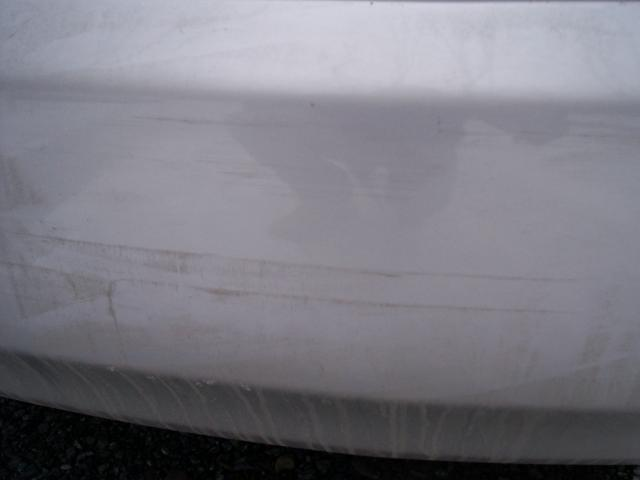

In [36]:
from IPython.display import Image
PATH = '/data/cached_images/tractable-images-narwhal-anonymised/'
Image(filename = PATH + "5a8f5aad-8a06-5833-a49c-534da45ea7fe.jpg", width=300, height=300)

In [37]:
yihkai_nugen_toyota_undamaged_3up.to_csv('/data/elnaram/nugen_csv/yihkai_nugen_toyota_undamaged_3up.csv', index=False)

In [38]:
%%time
img_files_toyota_undamaged_3up = []
for i in yihkai_nugen_toyota_undamaged_3up['image_id']:
    path = os.path.join('/data/cached_images/tractable-images-narwhal-anonymised', i) + '.jpg'
    ## check if the file exists in the cached image directory
    if os.path.exists(str(path)):
        img_files_toyota_undamaged_3up.append(path)

CPU times: user 160 ms, sys: 347 ms, total: 507 ms
Wall time: 42.8 s


In [39]:
len(img_files_toyota_undamaged_3up)

6581

In [40]:
# https://keras.io/examples/vision/image_classification_from_scratch/#filter-out-corrupted-images
# When working with lots of real-world image data, corrupted images are a common occurence. 
# Filter out corrupted images 

num_skipped = 0
import tensorflow as tf

# for fname in os.listdir(dir_path):
#     fpath = os.path.join(dir_path, fname)
def check_4corrupt_imgs(filenames):
    num_skipped = 0
    num_images=0
    lst_corrupt = []
    for fpath in filenames:
        num_images+=1
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)  # fix for Corrupt JPEG data: 'n' extraneous bytes before marker 0xd9
            check_chars = fobj.read()[-2:]

        finally:
            fobj.close()
        
        if not is_jfif:
            num_skipped += 1
            lst_corrupt.append(fpath)
        
        if check_chars != b'\xff\xd9': # fix for Corrupt JPEG data: premature end of data segment
            num_skipped += 1
            lst_corrupt.append(fpath)
            
        if (num_images % 10 == 0):
            # print("Processed images: ", num_images, "  Number of skipped images: ", num_skipped, end='', flush=True)
            print("Processed images: {}/{}({:.2f}%) \t Number of corrupt images: {}".format(num_images, len(img_files_toyota_undamaged_3up), (num_images/len(img_files_toyota_undamaged_3up))*100, num_skipped), end='', flush=True)
            print('\r', end='')

        
    # print("Corrupt %d images" % num_skipped)
    return lst_corrupt

In [41]:
img_files_toyota_undamaged_3up_corrupt = check_4corrupt_imgs(img_files_toyota_undamaged_3up)

In [42]:
img_files_toyota_undamaged_3up_non_corrupt = [x for x in img_files_toyota_undamaged_3up if x not in set(img_files_toyota_undamaged_3up_corrupt)]
len(img_files_toyota_undamaged_3up_non_corrupt)

6161

In [43]:
saveList(img_files_toyota_undamaged_3up_non_corrupt,'/data/elnaram/nugen_npy/img_files_toyota_undamaged_3up_non_corrupt.npy')

Saved successfully!


### Damaged Toyota Camry's

In [44]:
yihkai_nugen_toyota_damaged = yihkai_nugen_toyota[~yihkai_nugen_toyota.image_id.isin(yihkai_nugen_toyota_undamaged.image_id)].copy()

In [45]:
Counter(yihkai_nugen_toyota_damaged.num_present_parts).most_common()

[(3, 4004),
 (10, 3667),
 (9, 3381),
 (1, 2970),
 (4, 2959),
 (5, 2765),
 (2, 2677),
 (6, 1219),
 (7, 1064),
 (8, 928),
 (11, 58),
 (12, 4)]

In [46]:
Counter(yihkai_nugen_toyota_damaged.num_dmg_parts).most_common()

[(1, 13050),
 (2, 6232),
 (3, 3790),
 (4, 1799),
 (5, 641),
 (6, 154),
 (7, 29),
 (8, 1)]

In [47]:
Counter(yihkai_nugen_toyota_damaged[(yihkai_nugen_toyota_damaged['num_present_parts'] > 3) & (yihkai_nugen_toyota_damaged['num_present_parts'] < 5)].num_dmg_parts).most_common()

[(1, 1192), (2, 794), (3, 717), (4, 256)]

In [52]:
Counter(yihkai_nugen_toyota_damaged[(yihkai_nugen_toyota_damaged['num_present_parts'] > 3)].num_dmg_parts).most_common()

[(1, 6963),
 (2, 3499),
 (3, 2959),
 (4, 1799),
 (5, 641),
 (6, 154),
 (7, 29),
 (8, 1)]

In [50]:
yihkai_nugen_toyota_damaged_3up = yihkai_nugen_toyota_damaged[(yihkai_nugen_toyota_damaged['num_present_parts'] > 3) & (yihkai_nugen_toyota_damaged['num_dmg_parts'] < 4)]

In [51]:
yihkai_nugen_toyota_damaged_3up.shape

(13421, 88)

In [53]:
%%time
img_files_toyota_damaged_3up = []
for i in yihkai_nugen_toyota_damaged_3up['image_id']:
    path = os.path.join('/data/cached_images/tractable-images-narwhal-anonymised', i) + '.jpg'
    ## check if the file exists in the cached image directory
    if os.path.exists(str(path)):
        img_files_toyota_damaged_3up.append(path)

CPU times: user 815 ms, sys: 4.17 s, total: 4.99 s
Wall time: 7min 32s


In [54]:
len(img_files_toyota_damaged_3up)

11479

In [55]:
# https://keras.io/examples/vision/image_classification_from_scratch/#filter-out-corrupted-images
# When working with lots of real-world image data, corrupted images are a common occurence. 
# Filter out corrupted images 

num_skipped = 0
import tensorflow as tf

# for fname in os.listdir(dir_path):
#     fpath = os.path.join(dir_path, fname)
def check_4corrupt_imgs(filenames):
    num_skipped = 0
    num_images=0
    lst_corrupt = []
    for fpath in filenames:
        num_images+=1
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)  # fix for Corrupt JPEG data: 'n' extraneous bytes before marker 0xd9
            check_chars = fobj.read()[-2:]

        finally:
            fobj.close()
        

        if not is_jfif:
            num_skipped += 1
            lst_corrupt.append(fpath)
        
        if check_chars != b'\xff\xd9': # fix for Corrupt JPEG data: premature end of data segment
            num_skipped += 1
            lst_corrupt.append(fpath)
            
        if (num_images % 10 == 0):
            # print("Processed images: ", num_images, "  Number of skipped images: ", num_skipped, end='', flush=True)
            print("\t Processed images: {}/{}({:.2f}%) \t Number of corrupt images: {}".format(num_images, len(img_files_toyota_damaged_3up), (num_images/len(img_files_toyota_damaged_3up))*100, num_skipped), end='', flush=True)
            print('\r', end='')

        
    print("Corrupt %d images \t" % num_skipped)
    return lst_corrupt

In [56]:
img_files_toyota_damaged_3up_corrupt = check_4corrupt_imgs(img_files_toyota_damaged_3up)

Corrupt 1268 images 	1470/11479(99.92%) 	 Number of corrupt images: 1267


In [57]:
img_files_toyota_damaged_3up_non_corrupt = [x for x in img_files_toyota_damaged_3up if x not in set(img_files_toyota_damaged_3up_corrupt)]
len(img_files_toyota_damaged_3up_non_corrupt)

10227

In [58]:
saveList(img_files_toyota_damaged_3up_non_corrupt,'/data/elnaram/nugen_npy/img_files_toyota_damaged_3up_non_corrupt.npy')

Saved successfully!


In [202]:
yihkai_nugen_honda = yihkai_nugen_clean[yihkai_nugen_clean.image_id.isin(SIL_crv_honda_07_4dut_red.image_id)].copy()

In [203]:
yihkai_nugen_honda.shape

(744, 88)

In [204]:
yihkai_nugen_honda.head()

,imbag_id,image_id,set,not_fbumper,fbumper_undmg,fbumper_dmg,not_bbumper,bbumper_undmg,bbumper_dmg,not_bonnet,bonnet_undmg,bonnet_dmg,not_bootlid,bootlid_undmg,bootlid_dmg,not_flwing,flwing_undmg,flwing_dmg,not_frwing,frwing_undmg,frwing_dmg,not_blwing,blwing_undmg,blwing_dmg,not_brwing,brwing_undmg,brwing_dmg,not_fldoor,fldoor_undmg,fldoor_dmg,not_frdoor,frdoor_undmg,frdoor_dmg,not_rldoor,rldoor_undmg,rldoor_dmg,not_rrdoor,rrdoor_undmg,rrdoor_dmg,not_grille,grille_undmg,grille_dmg,not_lheadlamp,lheadlamp_undmg,lheadlamp_dmg,not_rheadlamp,rheadlamp_undmg,rheadlamp_dmg,not_ltaillamp,ltaillamp_undmg,ltaillamp_dmg,not_rtaillamp,rtaillamp_undmg,rtaillamp_dmg,not_lmirror,lmirror_undmg,lmirror_dmg,not_rmirror,rmirror_undmg,rmirror_dmg,not_lrockerpanel,lrockerpanel_undmg,lrockerpanel_dmg,not_rrockerpanel,rrockerpanel_undmg,rrockerpanel_dmg,not_fwindshield,fwindshield_undmg,fwindshield_dmg,not_rwindshield,rwindshield_undmg,rwindshield_dmg,dataset_id,augmentation_type,augmentation_scale,x,y,w,h,not_bbox,bbox_undmg,bbox_dmg,not_bboxx,bboxx_undmg,bboxx_dmg,num_missing_parts,num_present_parts,num_dmg_parts
3516,a0d54ef0-d0d2-403a-912b-5b7b0002e600,644195d0-dbd4-524e-ae8c-0c03b81e2105,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,NUGEN,None,0,0.497557,0.536247,0.986776,0.931964,0.497557,0.536247,0.931964,0.986776,0.986776,0.986776,13,10,1
23682,325e1253-269d-40af-8536-214e07e81499,40d7118b-934a-5789-a4e5-140662760d23,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,NUGEN,None,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20,3,0
39540,09ea00a2-6a06-4a90-9e51-3505aa863fc0,a06c4e15-95d1-52d2-8277-92864710fd9c,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,NUGEN,None,0,0.486327,0.444807,0.873134,0.825575,0.486327,0.444807,0.825575,0.873134,0.873134,0.873134,16,7,0
119663,720373e2-762d-444f-ad82-326f38198ddc,df3a0370-e766-5bee-91fc-c2f715ef0cca,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,NUGEN,None,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23,0,0
130309,793a6440-290b-4707-a16f-fb298214bd9f,6cf86cc1-0be2-5ecc-a0c4-dba5a399fe4c,2,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,NUGEN,None,0,0.507728,0.499711,1.040988,1.014476,0.507728,0.499711,1.000000,1.000000,1.000000,1.000000,17,6,1


In [205]:
yihkai_nugen_honda.shape

(744, 88)

In [206]:
yihkai_nugen_honda = yihkai_nugen_honda.drop_duplicates()
yihkai_nugen_honda.shape

(703, 88)

In [207]:
# find all undamaged cars -> 54512 images
def all_zeros(row):
    if all([v==0 for v in row.values]):
        return True
    else:
        return False
    
yihkai_nugen_honda_undamaged = yihkai_nugen_honda[yihkai_nugen_honda[damage_cols].apply(all_zeros, axis=1)]
yihkai_nugen_honda_undamaged.shape

(488, 88)

In [208]:
Counter(yihkai_nugen_honda_undamaged.num_present_parts).most_common()

[(0, 257),
 (9, 77),
 (1, 37),
 (10, 30),
 (2, 24),
 (5, 19),
 (3, 14),
 (7, 8),
 (4, 8),
 (11, 6),
 (8, 6),
 (6, 2)]

In [209]:
yihkai_nugen_honda_undamaged_3up = yihkai_nugen_honda_undamaged[yihkai_nugen_honda_undamaged['num_present_parts'] > 3]

In [210]:
yihkai_nugen_honda_undamaged_3up.head()

,imbag_id,image_id,set,not_fbumper,fbumper_undmg,fbumper_dmg,not_bbumper,bbumper_undmg,bbumper_dmg,not_bonnet,bonnet_undmg,bonnet_dmg,not_bootlid,bootlid_undmg,bootlid_dmg,not_flwing,flwing_undmg,flwing_dmg,not_frwing,frwing_undmg,frwing_dmg,not_blwing,blwing_undmg,blwing_dmg,not_brwing,brwing_undmg,brwing_dmg,not_fldoor,fldoor_undmg,fldoor_dmg,not_frdoor,frdoor_undmg,frdoor_dmg,not_rldoor,rldoor_undmg,rldoor_dmg,not_rrdoor,rrdoor_undmg,rrdoor_dmg,not_grille,grille_undmg,grille_dmg,not_lheadlamp,lheadlamp_undmg,lheadlamp_dmg,not_rheadlamp,rheadlamp_undmg,rheadlamp_dmg,not_ltaillamp,ltaillamp_undmg,ltaillamp_dmg,not_rtaillamp,rtaillamp_undmg,rtaillamp_dmg,not_lmirror,lmirror_undmg,lmirror_dmg,not_rmirror,rmirror_undmg,rmirror_dmg,not_lrockerpanel,lrockerpanel_undmg,lrockerpanel_dmg,not_rrockerpanel,rrockerpanel_undmg,rrockerpanel_dmg,not_fwindshield,fwindshield_undmg,fwindshield_dmg,not_rwindshield,rwindshield_undmg,rwindshield_dmg,dataset_id,augmentation_type,augmentation_scale,x,y,w,h,not_bbox,bbox_undmg,bbox_dmg,not_bboxx,bboxx_undmg,bboxx_dmg,num_missing_parts,num_present_parts,num_dmg_parts
39540,09ea00a2-6a06-4a90-9e51-3505aa863fc0,a06c4e15-95d1-52d2-8277-92864710fd9c,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,NUGEN,None,0,0.486327,0.444807,0.873134,0.825575,0.486327,0.444807,0.825575,0.873134,0.873134,0.873134,16,7,0
301140,ac982c0e-3466-4a85-b869-5fd5b88cd895,cf221402-3a78-5129-99ea-ff40c166a50a,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,NUGEN,None,0,0.508141,0.543721,0.930689,0.854909,0.508141,0.543721,0.854909,0.930689,0.930689,0.930689,14,9,0
385025,214dd8e0-88db-4761-a5a0-c4d02def0019,85ac77a7-7205-5260-accc-f983ff639d29,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,NUGEN,None,0,0.411431,0.515277,0.810780,0.865272,0.411431,0.515277,0.865272,0.810780,0.810780,0.810780,14,9,0
959308,29202579-a268-4d32-ae4b-eb5677cec0ed,a4b804c2-4f25-50a0-9e1c-324186fea248,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,NUGEN,None,0,0.515196,0.563893,0.926432,0.798352,0.515196,0.563893,0.798352,0.926432,0.926432,0.926432,14,9,0
1048088,6971f452-ed90-4a88-b2ab-5098f4932b72,fcd3c98e-1f70-5863-9646-2d83256eaef7,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,NUGEN,None,0,0.487674,0.513116,0.815140,0.786424,0.487674,0.513116,0.786424,0.815140,0.815140,0.815140,14,9,0


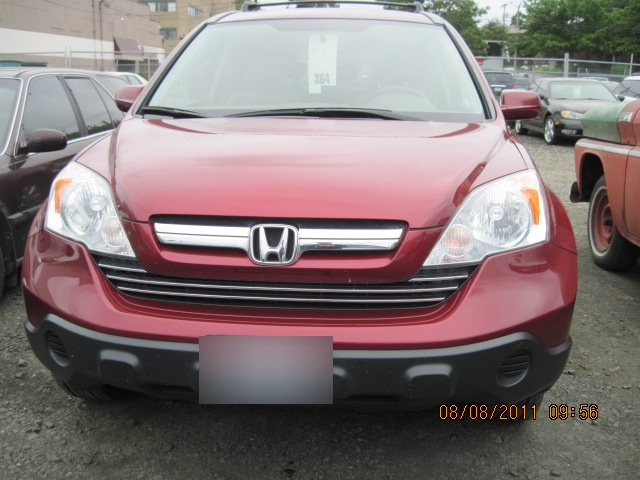

In [212]:
from IPython.display import Image
PATH = '/data/cached_images/tractable-images-narwhal-anonymised/'
Image(filename = PATH + "a06c4e15-95d1-52d2-8277-92864710fd9c.jpg", width=300, height=300)

In [213]:
yihkai_nugen_honda_undamaged_3up.to_csv('/data/elnaram/nugen_csv/yihkai_nugen_honda_undamaged_3up.csv', index=False)

In [214]:
%%time
img_files_honda_undamaged_3up = []
for i in yihkai_nugen_honda_undamaged_3up['image_id']:
    path = os.path.join('/data/cached_images/tractable-images-narwhal-anonymised', i) + '.jpg'
    ## check if the file exists in the cached image directory
    if os.path.exists(str(path)):
        img_files_honda_undamaged_3up.append(path)

CPU times: user 14.2 ms, sys: 25.1 ms, total: 39.3 ms
Wall time: 3.59 s


In [215]:
len(img_files_honda_undamaged_3up)

134

In [216]:
# https://keras.io/examples/vision/image_classification_from_scratch/#filter-out-corrupted-images
# When working with lots of real-world image data, corrupted images are a common occurence. 
# Filter out corrupted images 

num_skipped = 0
import tensorflow as tf

# for fname in os.listdir(dir_path):
#     fpath = os.path.join(dir_path, fname)
def check_4corrupt_imgs(filenames):
    num_skipped = 0
    num_images=0
    lst_corrupt = []
    for fpath in filenames:
        num_images+=1
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)  # fix for Corrupt JPEG data: 'n' extraneous bytes before marker 0xd9
            check_chars = fobj.read()[-2:]

        finally:
            fobj.close()
        

        if not is_jfif:
            num_skipped += 1
            lst_corrupt.append(fpath)
        
        if check_chars != b'\xff\xd9': # fix for Corrupt JPEG data: premature end of data segment
            num_skipped += 1
            lst_corrupt.append(fpath)
            
        if (num_images % 10 == 0):
            # print("Processed images: ", num_images, "  Number of skipped images: ", num_skipped, end='', flush=True)
            print("Processed images: {}/{}({:.2f}%) Number of corrupt images: {}".format(num_images, len(img_files_honda_undamaged_3up), (num_images/len(img_files_honda_undamaged_3up))*100, num_skipped), end='', flush=True)
            print('\r', end='')

        
    print("Corrupt %d images" % num_skipped)
    return lst_corrupt

In [217]:
img_files_honda_undamaged_3up_corrupt = check_4corrupt_imgs(img_files_honda_undamaged_3up)

Corrupt 8 images: 130/134(97.01%) Number of corrupt images: 8


In [219]:
img_files_honda_undamaged_3up_non_corrupt = [x for x in img_files_honda_undamaged_3up if x not in set(img_files_honda_undamaged_3up_corrupt)]
len(img_files_honda_undamaged_3up_non_corrupt)

126

In [220]:
saveList(img_files_honda_undamaged_3up_non_corrupt,'/data/elnaram/nugen_npy/img_files_honda_undamaged_3up_non_corrupt.npy')

Saved successfully!
